In [2]:
# Importing required libraries for the project
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df=pd.read_csv("Life Expectancy Data.csv")
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Data Cleaning

In [6]:
data = df.copy()

In [7]:
data.columns = data.columns.str.strip().str.replace(' ', '_')
data.head(5)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
# Drop duplicate rows if any

before = data.shape[0]
data.drop_duplicates(inplace=True)
after = data.shape[0]

print(data.shape)

(2938, 22)


In [9]:
# Checking total missing values per column
print("                                 Missing values before handling:")
print(data.isnull().sum())

                                 Missing values before handling:
Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


In [10]:
# Handling missing values by replacing with median and mode

for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

In [11]:
print("                                 Missing values after handling:")
print(data.isnull().sum())

                                 Missing values after handling:
Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64


In [12]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [13]:
data.nunique

<bound method DataFrame.nunique of           Country  Year      Status  Life_expectancy  Adult_Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  \
0         

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2938 non-null   float64
 4   Adult_Mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [15]:
data.dtypes.value_counts()

float64    16
int64       4
object      2
Name: count, dtype: int64

In [16]:
# Check duplicates
print("\nDuplicate rows:", data.duplicated().sum())


Duplicate rows: 0


In [17]:
data.nunique()

Country                             193
Year                                 16
Status                                2
Life_expectancy                     362
Adult_Mortality                     425
infant_deaths                       209
Alcohol                            1077
percentage_expenditure             2328
Hepatitis_B                          87
Measles                             958
BMI                                 608
under-five_deaths                   252
Polio                                73
Total_expenditure                   819
Diphtheria                           81
HIV/AIDS                            200
GDP                                2491
Population                         2279
thinness__1-19_years                200
thinness_5-9_years                  207
Income_composition_of_resources     625
Schooling                           173
dtype: int64

In [18]:
# Dropping the  Country column
data = data.drop(columns=['Country'])


In [19]:
# Convert 'Status' to numeric (Developing = 0, Developed = 1)
data['Status'] = data['Status'].map({'Developing': 0, 'Developed': 1})


In [20]:
data.head(5)

,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Exploratory Data Analysis(EDA)

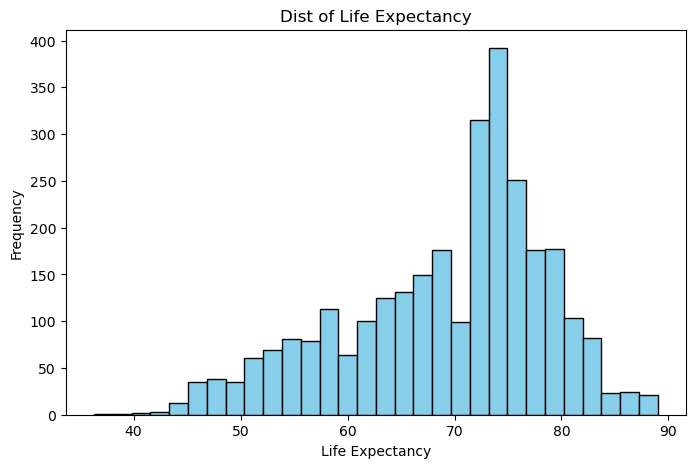

In [21]:
plt.figure(figsize=(8,5))
plt.hist(data['Life_expectancy'], bins=30, color='skyblue', edgecolor='black')
plt.title('Dist of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

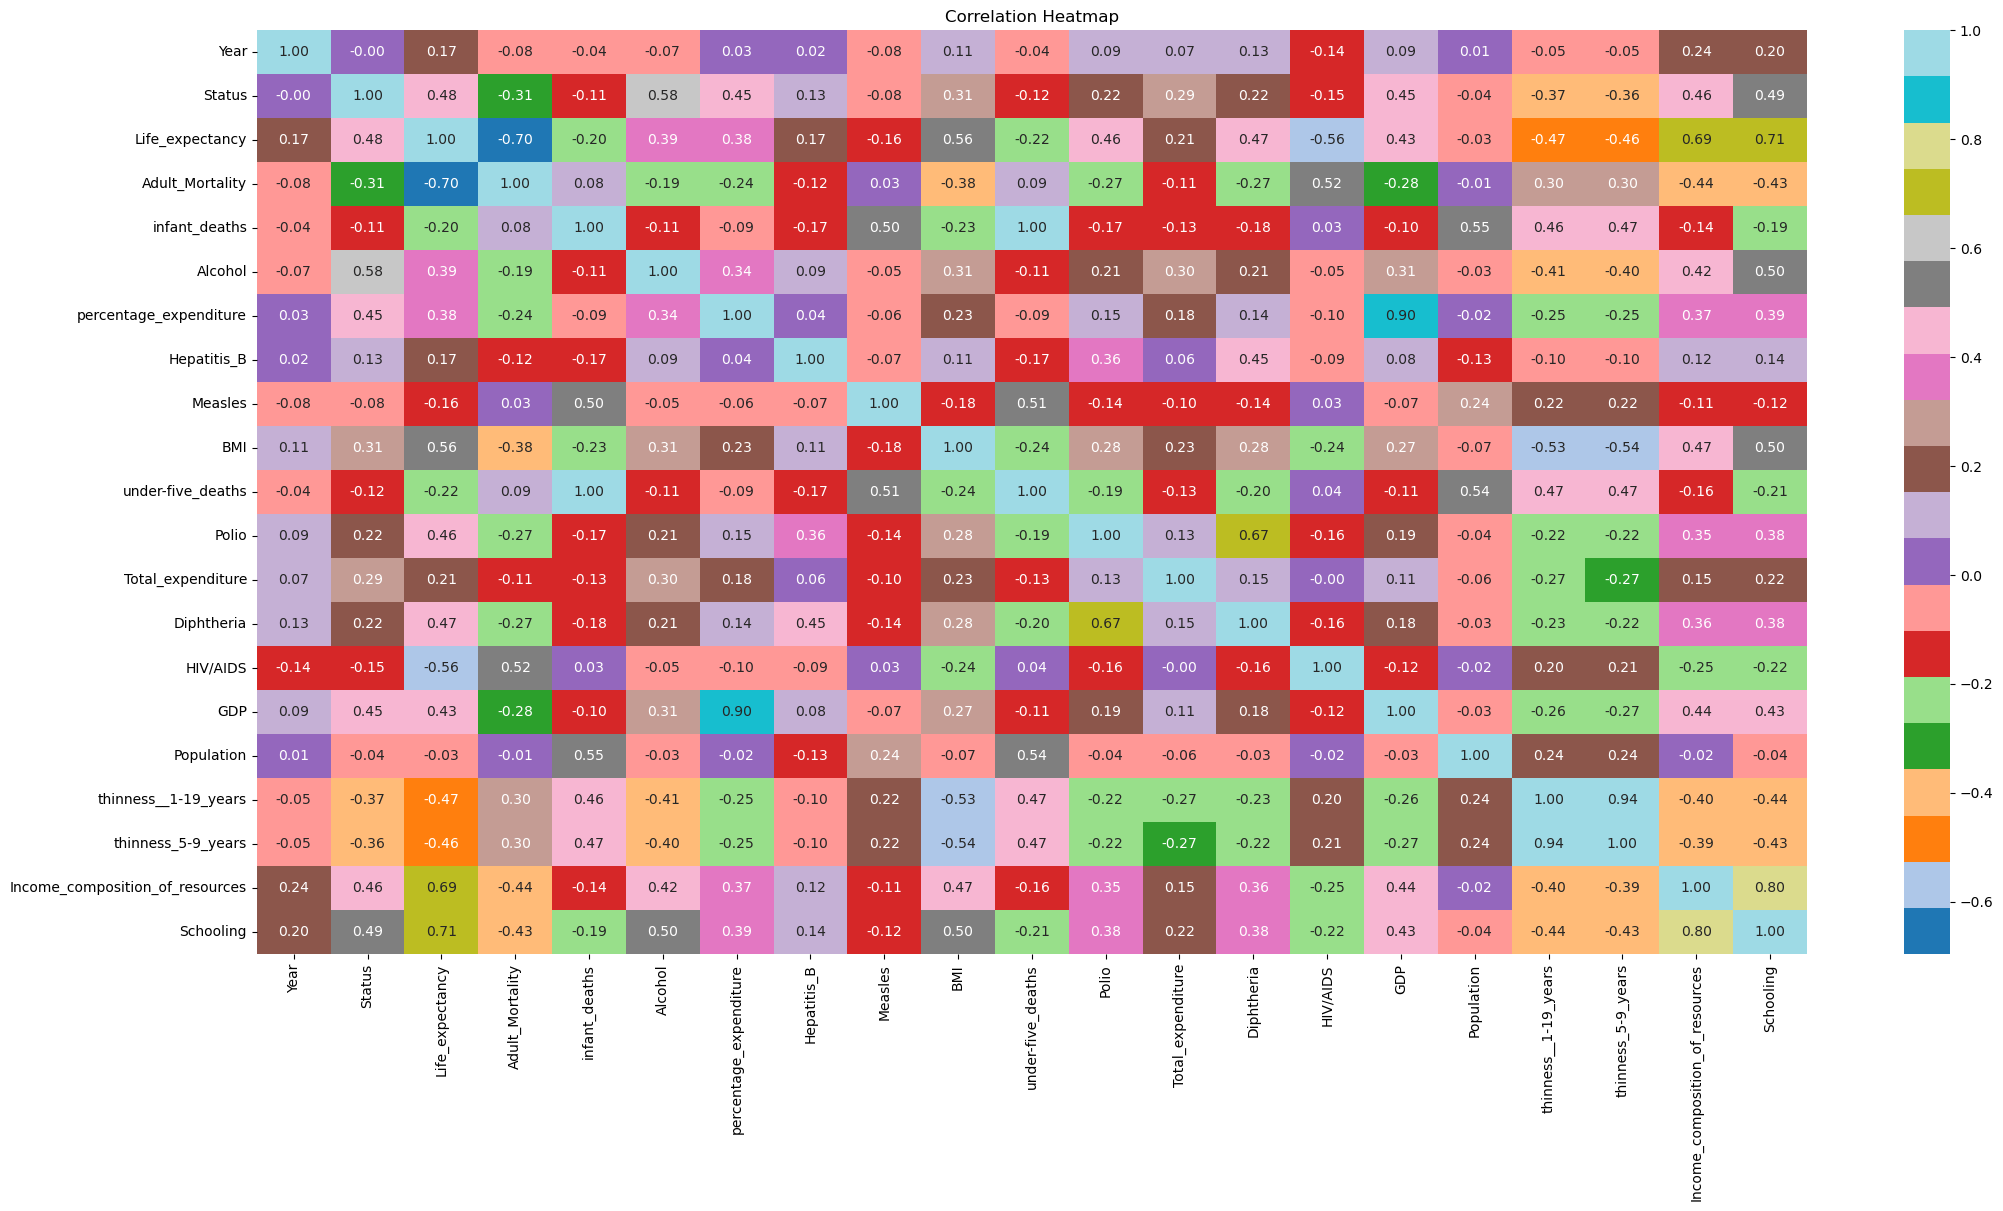

In [22]:
# Correlation heatmap
plt.figure(figsize=(25, 12))
sns.heatmap(data.corr(), cmap='tab20', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

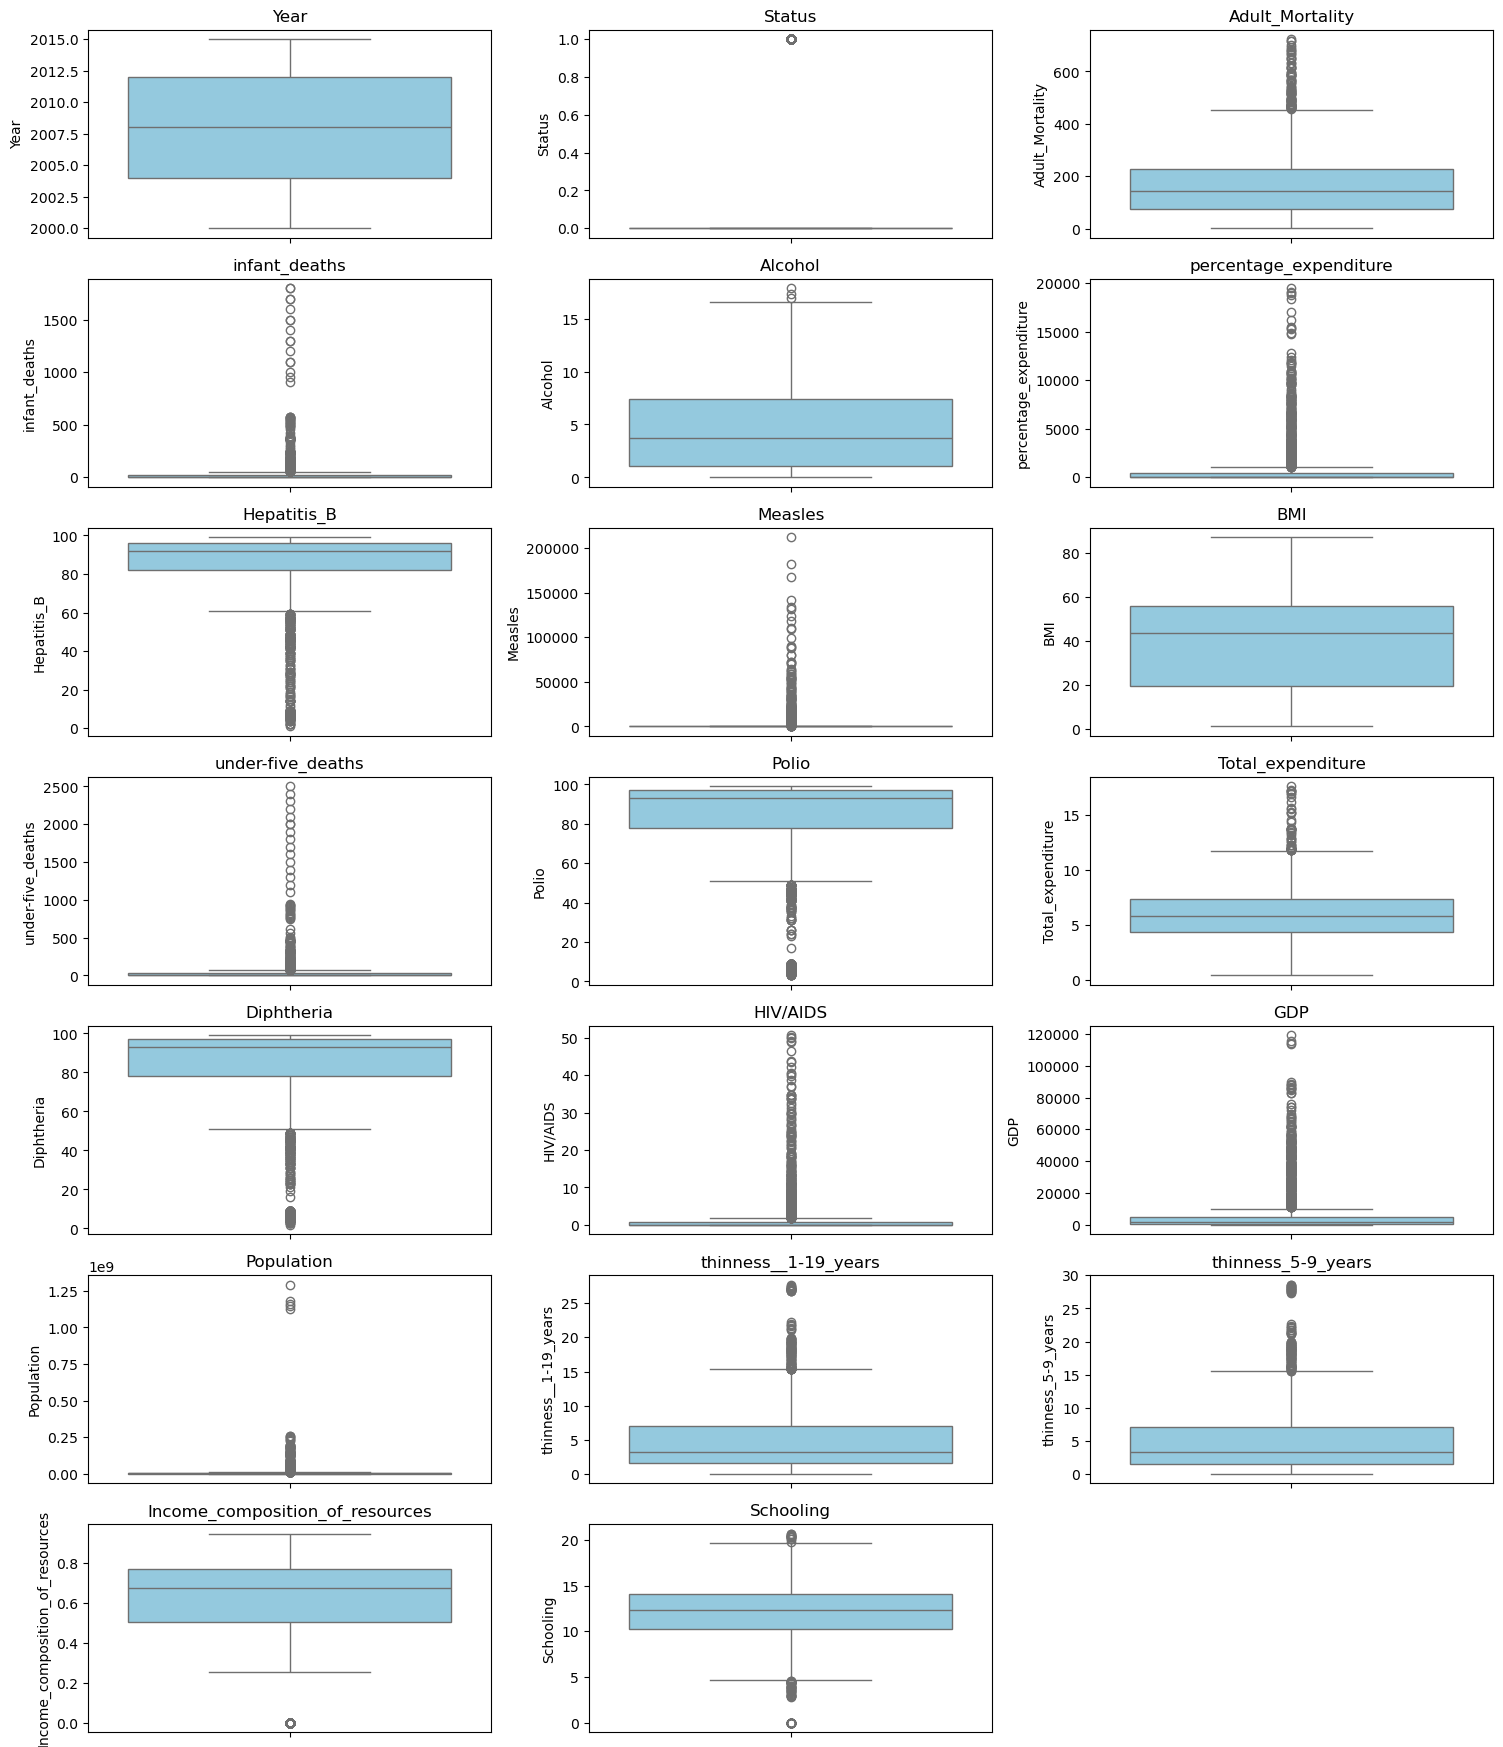

In [23]:
# Checking the outliers 


numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('Life_expectancy')  #  target variable



plt.figure(figsize=(15, 25))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(10, 3, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [24]:
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Life_expectancy':  # skipping the target column
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Capping the values
        data[col] = data[col].clip(lower, upper)

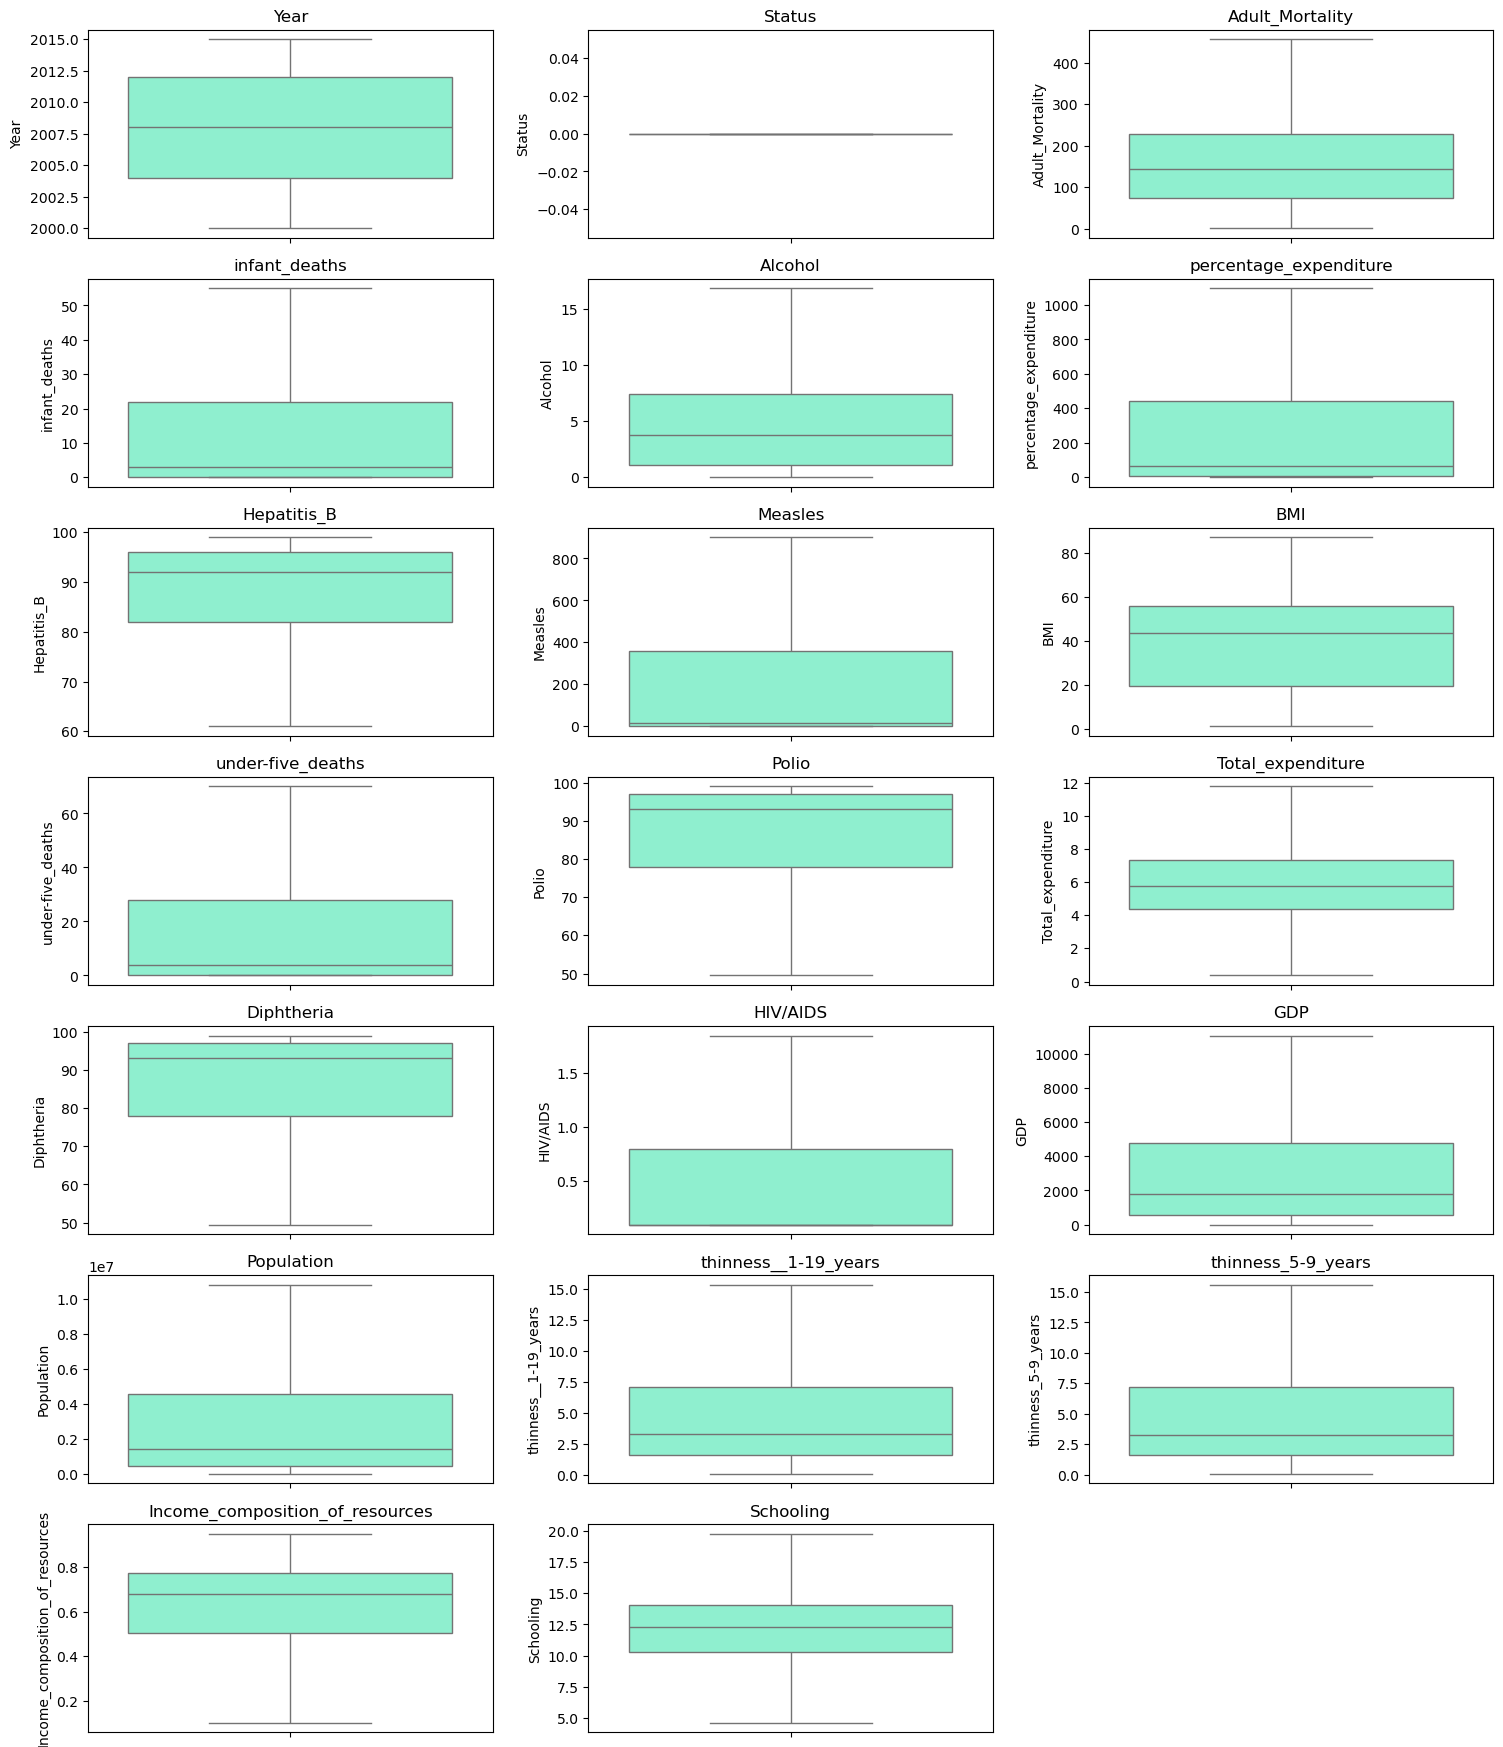

In [25]:
# After capping the outliers
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('Life_expectancy')  #  target variable



plt.figure(figsize=(15, 25))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(10, 3, i)
    sns.boxplot(y=data[col], color='aquamarine')
    plt.title(col)
plt.tight_layout()
plt.show()

# Train-Test Split

In [26]:
X = data.drop(columns=['Life_expectancy', 'Country'], errors='ignore')
X = pd.get_dummies(X, drop_first=True)  
y = data['Life_expectancy'] # trarget variable

In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Fit Model & Check Summary

In [28]:
import statsmodels.api as sm

# Add constant for intercept
X_train_sm = sm.add_constant(X_train)

In [29]:
# Fit model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Print summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     619.3
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:32:19   Log-Likelihood:                -5577.5
No. Observations:                2056   AIC:                         1.120e+04
Df Residuals:                    2036   BIC:                         1.131e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [30]:
insignificant = ['Measles', 'BMI', 'GDP', 'thinness__1-19_years']
X_train = X_train.drop(columns=insignificant)
X_test = X_test.drop(columns=insignificant)

In [31]:
X_train_sm = sm.add_constant(X_train)
model_refined = sm.OLS(y_train, X_train_sm).fit()
print(model_refined.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     785.9
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:32:19   Log-Likelihood:                -5577.7
No. Observations:                2056   AIC:                         1.119e+04
Df Residuals:                    2040   BIC:                         1.128e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
7,under-five_deaths,172.12
3,infant_deaths,165.04
10,Diphtheria,123.53
8,Polio,115.64
0,Year,114.25
6,Hepatitis_B,74.65
15,Schooling,69.86
14,Income_composition_of_resources,46.40
9,Total_expenditure,8.60
2,Adult_Mortality,5.21


In [33]:
cols_to_drop = ['infant_deaths', 'Polio', 'Hepatitis_B', 'Income_composition_of_resources','Year']
X_train = X_train.drop(columns=cols_to_drop)
X_test = X_test.drop(columns=cols_to_drop)

In [34]:
vif = pd.DataFrame()
vif["Feature"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF', ascending=False))

                   Feature    VIF
10               Schooling  28.63
6               Diphtheria  28.10
5        Total_expenditure   8.05
1          Adult_Mortality   4.91
2                  Alcohol   3.66
9       thinness_5-9_years   3.53
7                 HIV/AIDS   3.00
4        under-five_deaths   2.68
3   percentage_expenditure   2.19
8               Population   1.98
0                   Status    NaN


In [35]:
X_train_sm = sm.add_constant(X_train)
model_refined = sm.OLS(y_train, X_train_sm).fit()
print(model_refined.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1055.
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:32:19   Log-Likelihood:                -5676.3
No. Observations:                2056   AIC:                         1.137e+04
Df Residuals:                    2045   BIC:                         1.144e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     61

In [36]:
X_train = X_train.drop(columns=['Total_expenditure'])
X_test = X_test.drop(columns=['Total_expenditure'])


In [37]:
X_train_sm = sm.add_constant(X_train)
final_model = sm.OLS(y_train, X_train_sm).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1171.
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:32:19   Log-Likelihood:                -5677.5
No. Observations:                2056   AIC:                         1.137e+04
Df Residuals:                    2046   BIC:                         1.143e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     62

# Model Evaluation

In [38]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [39]:
y_pred_train = final_model.predict(X_train_sm)
y_pred_test = final_model.predict(X_test_sm)

In [40]:
print("Train R-squared:", r2_score(y_train, y_pred_train))
print("Test R-squared:", r2_score(y_test, y_pred_test))

Train R-squared: 0.8374362148228076
Test R-squared: 0.8316444342732165


In [41]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_test))

Mean Absolute Error (MAE): 2.8903593465916164


In [42]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE: 3.9104471293559313


# Model Comparison - Ridge and Lasso Regression

In [43]:
from sklearn.linear_model import Ridge, Lasso
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [45]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

In [46]:
print("Model Comparison Results:")
print(f"Linear Regression R_square: {r2_score(y_test, y_pred_test):.2f}")
print(f"Ridge Regression R_square:  {r2_score(y_test, ridge_pred):.2f}")
print(f"Lasso Regression R_square:  {r2_score(y_test, lasso_pred):.2f}")
print(f"Linear RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
print(f"Ridge RMSE:  {np.sqrt(mean_squared_error(y_test, ridge_pred)):.2f}")
print(f"Lasso RMSE:  {np.sqrt(mean_squared_error(y_test, lasso_pred)):.2f}")

Model Comparison Results:
Linear Regression R_square: 0.83
Ridge Regression R_square:  0.83
Lasso Regression R_square:  0.83
Linear RMSE: 3.91
Ridge RMSE:  3.91
Lasso RMSE:  3.91


In [47]:
residuals = y_test - y_pred_test
residuals

1698    3.890433
134     3.043091
1442   -0.795008
642    -1.265236
2720    2.385942
          ...   
1051   -4.092745
801     1.049994
631     4.951446
2582    4.151893
775     2.669503
Length: 882, dtype: float64

Text(0.5, 0, 'Predicted Values')

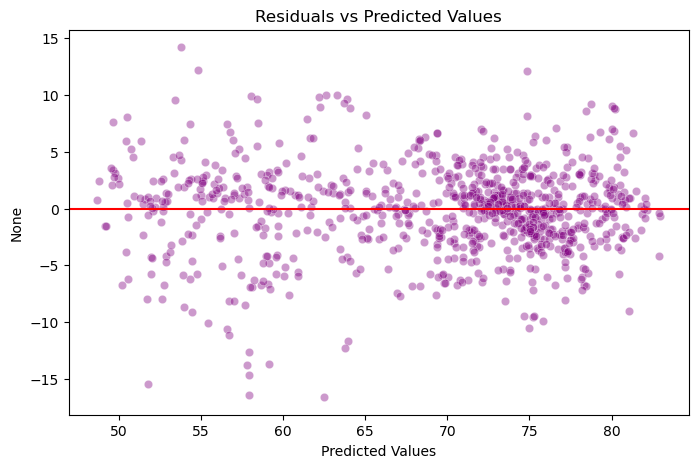

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_test, y=residuals, color='purple',alpha=0.4)
plt.axhline(y=0, color='r')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')

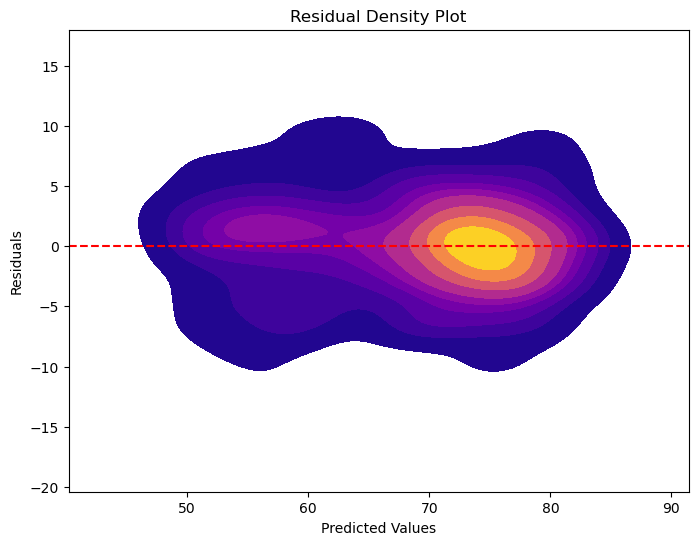

In [49]:
plt.figure(figsize=(8,6))
sns.kdeplot(x=y_pred_test, y=residuals, fill=True, cmap="plasma", thresh=0.05)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Density Plot")
plt.show()


# Interpretation
- The final multiple linear regression model achieved an R² value of 0.83, indicating that approximately 83% of the variation in Life Expectancy across different countries is explained by the independent variables used in the model.
- The model was found to be statistically significant (p-value < 0.001) with all key predictors having strong explanatory power.

- No major multicollinearity issues were observed after removing redundant features based on the Variance Inflation Factor (VIF).